In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix

In [271]:
df = pd.read_table('seeds_dataset.txt',header=None,sep='\t')
df = shuffle(df)
display(df)

x = df.iloc[:,:7]
y = df.iloc[:,7]

centers = np.array(x.sample(3))
clusters = np.zeros(len(x))

,0,1,2,3,4,5,6,7
129,17.55,15.66,0.8991,5.791,3.690,5.366,5.661,2
108,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2
125,18.75,16.18,0.8999,6.111,3.869,4.188,5.992,2
141,13.32,13.94,0.8613,5.541,3.073,7.035,5.440,3
52,14.49,14.61,0.8538,5.715,3.113,4.116,5.396,1
...,...,...,...,...,...,...,...,...
151,12.01,13.52,0.8249,5.405,2.776,6.992,5.270,3
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
155,11.19,13.05,0.8253,5.250,2.675,5.813,5.219,3
17,15.69,14.75,0.9058,5.527,3.514,1.599,5.046,1


In [272]:
def k_means(x, k):
    centers = np.array(x.sample(k))
    clusters = np.zeros(len(x))
    iterations = 100
    
    for iteration in range(iterations):
        for idx, data in enumerate(x.iloc):
            distance = [np.linalg.norm(center - data) for center in centers]
            clusters[idx] = np.argmin(distance)        
        centers = [np.array(x[clusters == idx]).mean(0) for idx in range(k)]
    
    return centers, clusters

In [273]:
_, clusters = k_means(x, 3)
indices = []
for idx in range(3):
    true_label = y[clusters == idx]
    value_counts = true_label.value_counts()
    print("cluster{}: ".format(idx+1))
    for i in range(1,4):
        print("  label {}:".format(i), value_counts[i]) if i in value_counts.keys() else print("  label {}:".format(i), 0)
    print("  largest value count is", value_counts.idxmax())
    indices.append(value_counts.idxmax())

y_pred = [indices[int(idx)] for idx in clusters]
print("\n", confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

cluster1: 
  label 1: 60
  label 2: 10
  label 3: 2
  largest value count is 1
cluster2: 
  label 1: 9
  label 2: 0
  label 3: 68
  largest value count is 3
cluster3: 
  label 1: 1
  label 2: 60
  label 3: 0
  largest value count is 2

 [[60  1  9]
 [10 60  0]
 [ 2  0 68]]
              precision    recall  f1-score   support

           1       0.83      0.86      0.85        70
           2       0.98      0.86      0.92        70
           3       0.88      0.97      0.93        70

    accuracy                           0.90       210
   macro avg       0.90      0.90      0.90       210
weighted avg       0.90      0.90      0.90       210



cluster1: 
  label 1: 2
  label 2: 63
  label 3: 0
  largest value count is 2
cluster2: 
  label 1: 12
  label 2: 3
  label 3: 60
  largest value count is 3
cluster3: 
  label 1: 56
  label 2: 4
  label 3: 10
  largest value count is 1


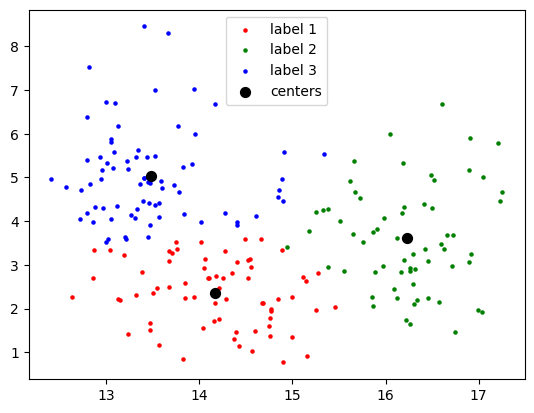

In [274]:
x2 = df.iloc[:, [1, 5]]
centers, clusters = k_means(x2, 3)

indices = []
for idx in range(3):
    true_label = y[clusters == idx]
    value_counts = true_label.value_counts()
    print("cluster{}: ".format(idx+1))
    for i in range(1,4):
        print("  label {}:".format(i), value_counts[i]) if i in value_counts.keys() else print("  label {}:".format(i), 0)
    print("  largest value count is", value_counts.idxmax())
    indices.append(value_counts.idxmax())
y_pred = [indices[int(idx)] for idx in clusters]
    
ls = []
centers = pd.DataFrame(centers)
clusters = pd.Series(clusters)
y_pred = pd.Series(y_pred)
colors = ['r', 'g', 'b', 'k']

plt.figure()
for idx in range(3):
    indices = y_pred[y_pred == idx+1].index
    l = plt.scatter(x2.iloc[indices, 0], x2.iloc[indices, 1], color=colors[idx], s=5)
    ls.append(l)
l = plt.scatter(centers.iloc[:, 0], centers.iloc[:, 1], color='k', s=50)
ls.append(l)
plt.legend(handles=ls, labels=["label 1", "label 2", "label 3", "centers"], loc="best")
plt.show()